<a id="table"></a>
<h1 style="background-color:yellow;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;"> 🌺  Iris Classification  🌺</h1>

## ![](https://media.giphy.com/media/ew2jp85lQIAJjcn4FG/giphy.gif)

<font color = '#F08841'>
    Content:
    
1. [Loading and Checking Data](#1)
1. [Creating Models](#2)
    *          [Logistic Regression ](#3)
    *          [KNN -K Nearest Neighbors ](#4)
    *          [SVC -Support Vector Classifier ](#5)
    *          [Naive Bayes  ](#6)
    *          [Decision Tree Classifier ](#7)
    *          [Random Forest Classifier ](#8)
1. [Evaluating Models](#9)
    *          [Confusion Matrix ](#10)
    *          [Accuracy Score ](#11)
1. [Conclusion](#12)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

# <a id="1"></a>
<h1 style="background-color:#35F237;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Loading and Checking Data</h1>

In [2]:
df = pd.read_csv('../input/iris/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


There is an 'ID' column, I will drop it right away, because the 'ID' column is meaningless for machine learning, it does not affect what the y column is and negatively affects the performance of our models.

In [3]:
df = df.drop('Id', axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Now it is better.

In [4]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

There are no null values, that's good.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


df's type is 'Data Frame' as it should be and df has 150 columns. When the 'ID' column is dropped, all x columns will be of float type.

In [6]:
#How many kinds of data are in column y, and how many of each kind? let's see that.

df["Species"].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

There are 3 kinds of species, and each kind is 50 pcs.

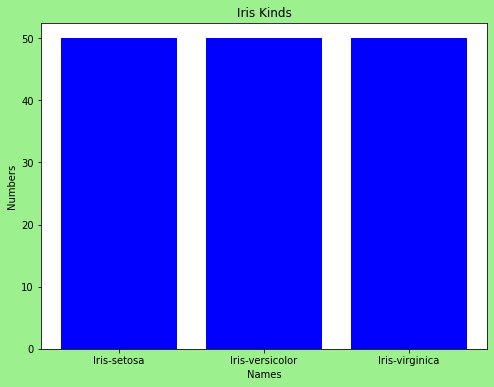

In [7]:
# Let's show what we see above with a bar graph.

plt.figure(figsize = (8,6),facecolor='#9DF08E')
plt.bar(df['Species'].unique(), df['Species'].value_counts(), color ='b')
plt.title('Iris Kinds')
plt.xlabel('Names')
plt.ylabel('Numbers')
plt.show()

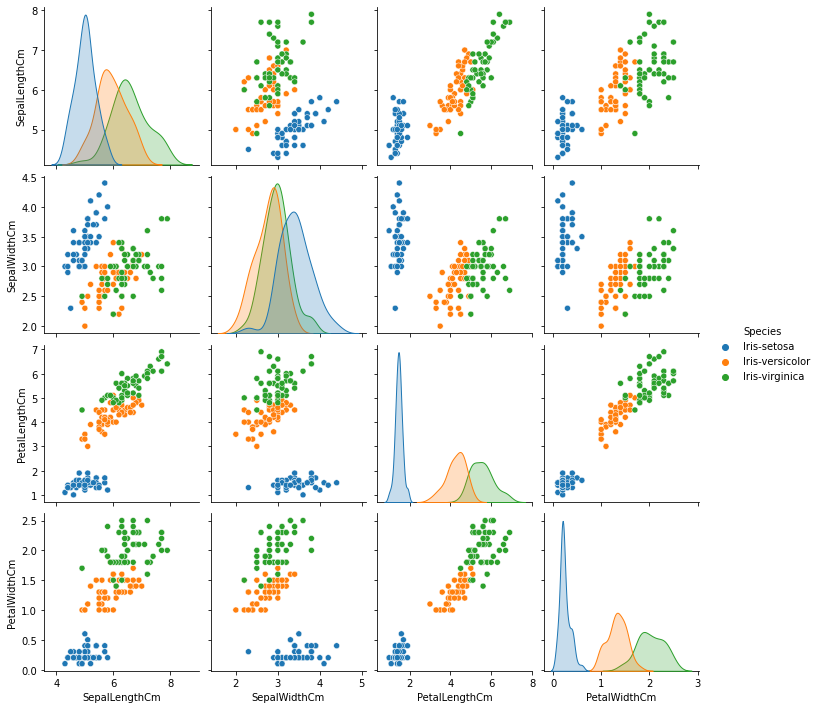

In [8]:
sns.pairplot(data=df, hue="Species")
plt.show()

Overall, the data distribution is very clean.

In [9]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


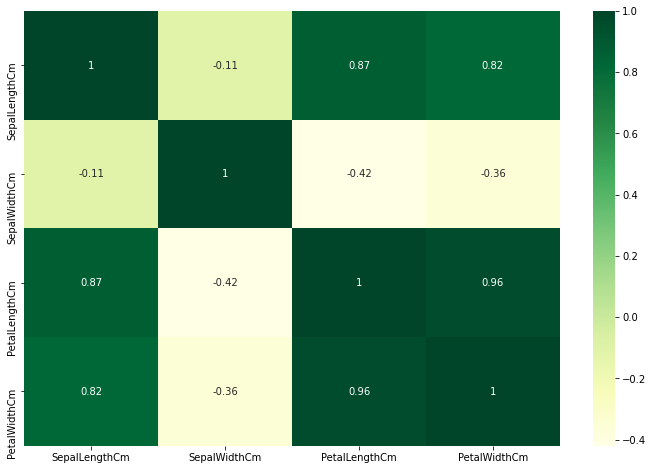

In [11]:
cor = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(data = cor, annot = True, cmap = plt.cm.YlGn)
plt.show()

The highest correlation is between Petal Length Cm and Petal WidthCm with a value of 0.96.

Also, the correlation between PetalLengthCm - SepalWidthCm is -0.42, meaning that as one increases, the other decreases, and vice versa.

# <a id="2"></a>
<h1 style="background-color:#35F237;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Creating Models</h1>

In [12]:
# x and y assignment

x = df.iloc[:,0:4]
y = df.iloc[:,4:]

In [13]:
#Let's see how x and y look

x.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [14]:
y.head(3)

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa


They are as they should be, nice.

In [15]:
# # Splitting the Data Set into Independent Variables and Dependent Variables

from sklearn.model_selection import train_test_split

x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.33, random_state=8)

## <a id="Classification Algorithms"></a>
<h1 style="background-color:red;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">~ Classification Algorithms ~</h1>
   

# <a id="3"></a>
<h1 style="background-color:#35F237;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Logistic Regression</h1>

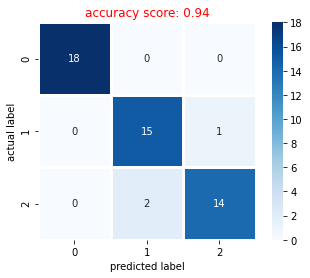

In [16]:
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression(random_state=8)
logr.fit(x_train,y_train)

y_pred = logr.predict(x_test)


# confusion matrix and accuracy score
accuracy_score_logr = accuracy_score(y_test,y_pred,3)
cm_logr = confusion_matrix(y_test,y_pred)
sns.heatmap(cm_logr, annot=True,fmt=".0f",linewidths=3,square=True, cmap='Blues',color="#cd1076")
plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.title(f'accuracy score: {accuracy_score_logr}',size=12,color='red')
plt.show()

# <a id="4"></a>
<h1 style="background-color:#35F237;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">KNN (K Neighbors Classifier)</h1>

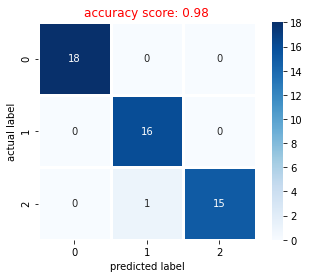

In [17]:

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10, metric = 'minkowski')
knn.fit(x_train,y_train)

y_pred = knn.predict(x_test)


# confusion matrix and accuracy score
accuracy_score_knn = accuracy_score(y_test,y_pred,3)
cm_knn = confusion_matrix(y_test,y_pred)
sns.heatmap(cm_knn, annot=True,fmt=".0f",linewidths=3,square=True, cmap='Blues',color="#cd1076")
plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.title(f'accuracy score: {accuracy_score_knn}',size=12,color='red')
plt.show()

# <a id="5"></a>
<h1 style="background-color:#35F237;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">SVC (Support Vector Classification - SVM Classifier)</h1>
 

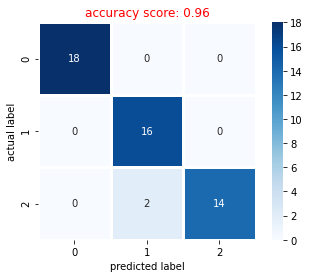

In [18]:
from sklearn.svm import SVC

svc = SVC(kernel = 'rbf', probability=True)
svc.fit(x_train,y_train)

y_pred = svc.predict(x_test)


# confusion matrix and accuracy score
accuracy_score_svc = accuracy_score(y_test,y_pred,3)
cm_svc = confusion_matrix(y_test,y_pred)
sns.heatmap(cm_svc, annot=True,fmt=".0f",linewidths=3,square=True, cmap='Blues',color="#cd1076")
plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.title(f'accuracy score: {accuracy_score_svc}',size=12,color='red')
plt.show()

I didn't use 'sigmoid' as Kernel Function because 'sigmoid' returns 1 or 0 so it makes sense to use sigmoid when column y has 2 kinds whereas column y has 3 kinds of data Among the remaining possibilities, 'poly' and 'rbf' made sense, I tried them and 'rbf' gave better performance, therefore I chose 'rbf'.

# <a id="6"></a>
<h1 style="background-color:#35F237;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Naive Bayes</h1>

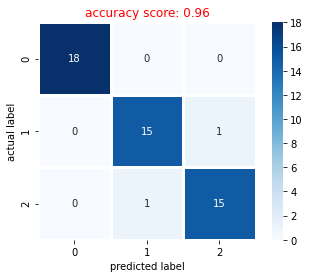

In [19]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(x_train,y_train)

y_pred = mnb.predict(x_test)

# confusion matrix and accuracy score
accuracy_score_mnb = accuracy_score(y_test,y_pred,3)
cm_mnb = confusion_matrix(y_test,y_pred)
sns.heatmap(cm_mnb, annot=True,fmt=".0f",linewidths=3,square=True, cmap='Blues',color="#cd1076")
plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.title(f'accuracy score: {accuracy_score_mnb}',size=12,color='red')
plt.show()

Why is Multinomial Naive Bayes more suitable for this data set?

If the column to be predicted is binomial, ie binary, ie 1 or 0, 'Bernoulli Naive Bayes' is used. I did not use 'Bernoulli' as the y column in this dataset is not binomial. (Similar to not using sigmoid in the svr just before)

If the column to be predicted consists of contunious numbers, that is, if it consists of real numbers, 'Gaussian Naive Bayes' is used. However, in this dataset, column y consists of strings, not real numbers. That's why I didn't use 'Gaussian Naive Bayes'.

If the column to be predicted consists of nominal data, 'Multinomial Naive Bayes' is used. In suitable with this kind of Naive Bayes, column y in this data set consists of nominal data. That's why I used 'Multinomial Naive Bayes'.


# <a id="7"></a>
<h1 style="background-color:#35F237;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Decision Tree</h1>

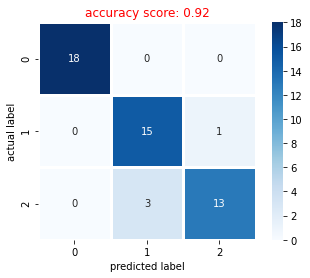

In [20]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion = 'entropy')
dtc.fit(x_train,y_train)

y_pred = dtc.predict(x_test)


# confusion matrix and accuracy score
accuracy_score_dtc = accuracy_score(y_test,y_pred,3)
cm_dtc = confusion_matrix(y_test,y_pred)
sns.heatmap(cm_dtc, annot=True,fmt=".0f",linewidths=3,square=True, cmap='Blues',color="#cd1076")
plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.title(f'accuracy score: {accuracy_score_dtc}',size=12,color='red')
plt.show()

# <a id="8"></a>
<h1 style="background-color:#35F237;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Random Forest</h1>

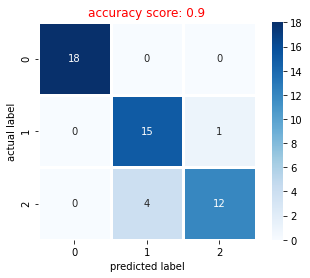

In [21]:
 from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 9, criterion = 'entropy')
rfc.fit(x_train,y_train)

y_pred = rfc.predict(x_test)


# confusion matrix and accuracy score
accuracy_score_rfc = accuracy_score(y_test,y_pred,3)
cm_rfc = confusion_matrix(y_test,y_pred)
sns.heatmap(cm_rfc, annot=True,fmt=".0f",linewidths=3,square=True, cmap='Blues',color="#cd1076")
plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.title(f'accuracy score: {accuracy_score_rfc}',size=12,color='red')
plt.show()

# <a id="9"></a>
<h1 style="background-color:red;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Evaluating Models</h1>

First of all, I would like to say that since the data set is balanced, I will use 'Accuracy Score', not 'F1 Score' when comparing models. If the data set was imbalanced I would use 'F1 Score'.

# <a id="10"></a>
<h1 style="background-color:#35F237;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Confusion Matrix</h1>

In [22]:
print('\033[93m' + '--CONFUSİON MATRİCES --\n' + '\033[0m')

print(f'Logistic Regression          \n{cm_logr}\n')
print(f'KNN-K Nearest Neighbors      \n{cm_knn}\n')
print(f'SVC-Support Vector Classifier\n{cm_svc}\n')
print(f'Multinomial Naive Bayes      \n{cm_mnb}\n')
print(f'Decision Tree Classifier     \n{cm_dtc}\n')
print(f'Random Forest Classifier     \n{cm_rfc}\n')

--CONFUSİON MATRİCES --

Logistic Regression          
[[18  0  0]
 [ 0 15  1]
 [ 0  2 14]]

KNN-K Nearest Neighbors      
[[18  0  0]
 [ 0 16  0]
 [ 0  1 15]]

SVC-Support Vector Classifier
[[18  0  0]
 [ 0 16  0]
 [ 0  2 14]]

Multinomial Naive Bayes      
[[18  0  0]
 [ 0 15  1]
 [ 0  1 15]]

Decision Tree Classifier     
[[18  0  0]
 [ 0 15  1]
 [ 0  3 13]]

Random Forest Classifier     
[[18  0  0]
 [ 0 15  1]
 [ 0  4 12]]



# <a id="11"></a>
<h1 style="background-color:#35F237;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Accuracy Scores</h1>

In [23]:
# Let's create a data frame and show scores.

NamesOfAlgorithms_df = pd.DataFrame(['Logistic Regression','KNN - K Nearest Neighbors','SVC - Support Vector Classifier','Multinomial Naive Bayes','Decision Tree Classifier','Random Forest Classifier'])
AcScoresOfAlgorithms_df = pd.DataFrame([accuracy_score_logr,accuracy_score_knn,accuracy_score_svc,accuracy_score_mnb,accuracy_score_dtc,accuracy_score_rfc])

df3 = pd.concat([NamesOfAlgorithms_df,AcScoresOfAlgorithms_df],axis=1)
df3.columns=['ALGORİTHM','ACCURACY SCORE',]

print(df3)

                         ALGORİTHM  ACCURACY SCORE
0              Logistic Regression            0.94
1        KNN - K Nearest Neighbors            0.98
2  SVC - Support Vector Classifier            0.96
3          Multinomial Naive Bayes            0.96
4         Decision Tree Classifier            0.92
5         Random Forest Classifier            0.90


KNN has the highest accuracy score.

In [24]:
# To better understand the Accuracy score, let's calculate it manually.
# Accuracy Score = (TP + TN) / (TP + TN + FN + FP)  
#                = (Sum of Main Diagonal Values) / (Sum of All Matrix Values)

print('\033[1m' + 'Number of predictions of all algorithms: 50\n' + '\033[0m')

truePredictsNumber_logr = cm_logr[0][0] + cm_logr[1][1] + cm_logr[2][2]
print('\033[4m' + 'Logistic Regression' + '\033[0m')
print(f'True Predicts: {truePredictsNumber_logr}')
print(f'True Predicts Ratio: {truePredictsNumber_logr/50:.2f} \n')

truePredictsNumber_knn = cm_knn[0][0] + cm_knn[1][1] + cm_knn[2][2]
print('\033[4m' + 'KNN' + '\033[0m')
print(f'True Predicts: {truePredictsNumber_knn}')
print(f'True Predicts Ratio: {truePredictsNumber_knn/50:.2f} \n')

truePredictsNumber_svc = cm_svc[0][0] + cm_svc[1][1] + cm_svc[2][2]
print('\033[4m' + 'SVC' + '\033[0m')
print(f'True Predicts: {truePredictsNumber_svc}')
print(f'True Predicts Ratio: {truePredictsNumber_svc/50:.2f} \n')

truePredictsNumber_mnb = cm_mnb[0][0] + cm_mnb[1][1] + cm_mnb[2][2]
print('\033[4m' + 'Naive Bayes' + '\033[0m')
print(f'True Predicts: {truePredictsNumber_mnb}')
print(f'True Predicts Ratio: {truePredictsNumber_mnb/50:.2f} \n')

truePredictsNumber_dtc = cm_dtc[0][0] + cm_dtc[1][1] + cm_dtc[2][2]
print('\033[4m' + 'Decision Tree' + '\033[0m')
print(f'True Predicts: {truePredictsNumber_dtc}')
print(f'True Predicts Ratio: {truePredictsNumber_dtc/50:.2f} \n')

truePredictsNumber_rfc = cm_rfc[0][0] + cm_rfc[1][1] + cm_rfc[2][2]
print('\033[4m' + 'Random Forest' + '\033[0m')
print(f'True Predicts: {truePredictsNumber_rfc}')
print(f'True Predicts Ratio: {truePredictsNumber_rfc/50:.2f}')

Number of predictions of all algorithms: 50

Logistic Regression
True Predicts: 47
True Predicts Ratio: 0.94 

KNN
True Predicts: 49
True Predicts Ratio: 0.98 

SVC
True Predicts: 48
True Predicts Ratio: 0.96 

Naive Bayes
True Predicts: 48
True Predicts Ratio: 0.96 

Decision Tree
True Predicts: 46
True Predicts Ratio: 0.92 

Random Forest
True Predicts: 45
True Predicts Ratio: 0.90


Notice that the values we found using the 'accuracy_score' in the 'sklearn' library are the same as the values we found manually.

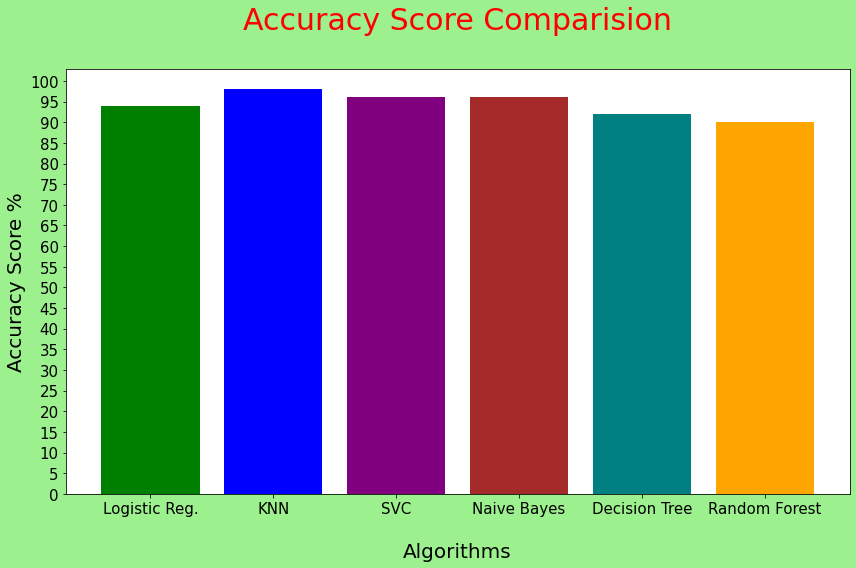

In [25]:
# Let's compare the accuracy scores on the bar graph.

algorithms_names = np.array(['Logistic Reg.','KNN','SVC','Naive Bayes','Decision Tree','Random Forest'])
accuracy_scores = np.array([accuracy_score_logr,accuracy_score_knn,accuracy_score_svc,accuracy_score_mnb,accuracy_score_dtc,accuracy_score_rfc])
accuracy_scores = accuracy_scores*100

plt.figure(figsize = (12,8),facecolor='#9DF08E')
colors_set = ['green','blue','purple','brown','teal','orange']
plt.bar(x=algorithms_names, height=accuracy_scores, color = colors_set)
plt.title('Accuracy Score Comparision\n', fontsize=30, color = 'red')
plt.xlabel('\nAlgorithms', fontsize=20)
plt.ylabel('Accuracy Score %', fontsize=20)
plt.xticks(horizontalalignment='center', fontsize='15')
plt.yticks(np.arange(0,101,5),fontsize='15')
plt.tight_layout()
plt.show()

# <a id="12"></a>
<h1 style="background-color:#35F237;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Conclusion</h1>

* The algorithm with the highest accuracy score in the classification of the Iris dataset was KNN.
* Since the data set is very clean, the score of other algorithms other than KNN was also very high, maybe some of them could have achieved a slightly higher score, but this also affects the cost negatively. For example, in Random Forest, we can increase the number of n_estimators even more, maybe good results, but if our data set consisted of thousands of rows instead of 150 rows, this would cause the algorithm to work slowly.
* The highest correlation is between Petal Length Cm and Petal WidthCm with a value of 0.96.
Also, the correlation between PetalLengthCm - SepalWidthCm is -0.42, meaning that as one increases, the other decreases, and vice versa.

 <h1 style="background-color:#10DEFF
;font-family:Comic Sans MS;font-size:225%;text-align:center;border-radius: 15px 50px;"> Thank you for reading😃 If you like it, please upvote👍  Please do not forget to write down your positive or negative opinions💬</h1><a id=note></a>